# Apply Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


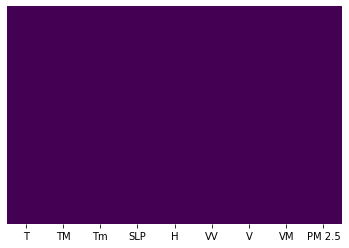

In [4]:
#Checking For Null Values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df = df.dropna()

In [6]:
#Independent Features
x = df.iloc[:,:-1]
#Dependent Feature
y = df.iloc[:,-1]

In [7]:
#checking for nulls
x.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: PM 2.5, Length: 730, dtype: bool

Pairplot:This shows the relationship for combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [ ]:
#Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plot Heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat.index

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

In [ ]:
x.head()

In [ ]:
#This shows how much particular feature has importance 
print(model.feature_importances_)

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
sns.distplot(y)

## Train   Test  Split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
regressor.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [22]:
regressor.intercept_

-157.37425475061195

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6007706404750854


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5316188612878155


In [25]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, x, y, cv=5)

In [26]:
score.mean()

0.46724362258523316

## Model Evaluation    

In [27]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['coefficient'])
coeff_df

,coefficient
T,2.639490
TM,0.519979
Tm,-7.598118
SLP,0.493220
H,-0.837064
VV,-50.430135
V,-2.754178
VM,-0.039266


### Interpreting the coefficients:

@ Holding all other features fixed, a 1 unit increase in T is associated with an increase of 2.639490 in AQI PM2.5 .           
@ Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.519979 in AQI PM 2.5 .         
@ Holding all other features fixed, a 1 unit increase in T is associated with an decrease of -7.598118 in AQI PM2.5 .           
@ Holding all other features fixed, a 1 unit increase in T is associated with an increse of 0.493220 in AQI PM2.5 .             
@ Holding all other features fixed, a 1 unit increase in T is associated with an deccrease of -0.837064 in AQI PM2.5 .         
@ Holding all other features fixed, a 1 unit increase in T is associated with an decrese of -50.430135 in AQI PM2.5 .           
@ Holding all other features fixed, a 1 unit increase in T is associated with an decrese of -2.754178 in AQI PM2.5 .           
@ Holding all other features fixed, a 1 unit increase in T is associated with an decrese of -0.039266 in AQI PM2.5 .           

In [28]:
prediction=regressor.predict(x_test)


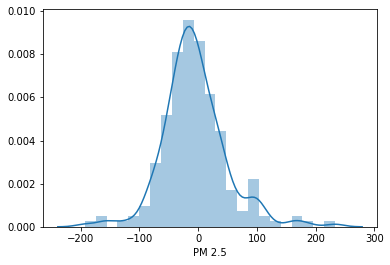

In [29]:
sns.distplot(y_test-prediction)


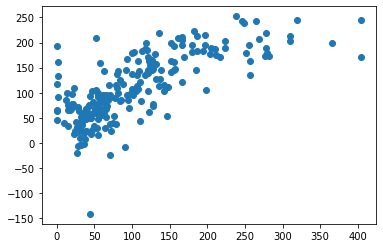

In [30]:
plt.scatter(y_test,prediction)

# #Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.                                                              
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.                
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.                                             
All of these are loss functions, because we want to minimize them.                                                             

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('MSE:', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

MAE: 40.28335537132939
MSE: 3057.664128674137
MSE: 6.346916997356228


In [33]:
import pickle

In [34]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)